# Assignment 4: Chapters 4.1-4.6 Numpy Basics, Arrays, Vectorization 

For this assignment, we will be covering topics from lectures 7 and 8: Numpy Basics, Array and Vectorization.

Complete the code segments according to instructions and comment or answer questions using Markdown

## Topics Covered

-  Numpy ndarrays
-  performance optimizations
-  vectorization and broadcasting
-  array slicing and indexing
-  conditional logic as array operations

In [541]:
import numpy as np
import matplotlib.pyplot as plt

## Question 1

What are the advantages of using numpy arrays over builtin python lists?

#solution



For questions 2-5 you will be applying functions to an MRI image that you will read in to a numpy ndarray.

### MRI imaging 

In an MRI image, a voxel is a three-dimensional element, analogous to a pixel in a 2D image, that represents a specific volume of tissue. Each voxel contains a single value that represents the average intensity of the tissue within that volume, providing information about the tissue's properties like density or magnetic resonance. 

An MRI image file is organized spatially with the format [depth x width x height].

For the following tasks, you will load a MRI voxel image of a brain, and perform operations on the image.   

## Question 2

### Import and analyze data

Read the file <b>assignment_files/MRI_small.npy</b> using the <b>MRI=np.load()</b> function.

In [593]:
MRI = np.load('assignment_files/MRI_small.npy')

Print the dimensions of the ndarray object. You should see (65,65,55)

In [596]:
MRI.shape

(65, 65, 55)

In [841]:
MRI[0]

array([[ 0.0000e+00, -2.8026e-45, -8.8282e-44, ...,  0.0000e+00,
         0.0000e+00,  0.0000e+00],
       [ 0.0000e+00, -1.4013e-45, -5.8855e-44, ...,  0.0000e+00,
         0.0000e+00, -0.0000e+00],
       [ 1.4013e-45, -5.8855e-44, -1.6928e-42, ...,  4.2039e-45,
         0.0000e+00,  0.0000e+00],
       ...,
       [-0.0000e+00, -0.0000e+00, -0.0000e+00, ...,  2.5689e-41,
         8.9263e-43,  0.0000e+00],
       [-0.0000e+00, -0.0000e+00, -0.0000e+00, ...,  8.9543e-43,
         3.0829e-44, -0.0000e+00],
       [-0.0000e+00, -0.0000e+00,  0.0000e+00, ...,  0.0000e+00,
        -0.0000e+00,  0.0000e+00]], dtype=float32)

Print the min, max, mean, standard deviation of the image.

In [599]:
print("Min:",MRI.min()," Max:",MRI.max(), " Mean:",MRI.mean()," Stdev:",MRI.std())

Min: -55605.438  Max: 1200689.6  Mean: 18109.889  Stdev: 54561.207


Run the provided <b>show_mri_slices()</b> function on the ndarray object you loaded to confirm correctness. 

You should see three orthogonal 2D slices from the center of the example brain.

In [782]:
def show_mri_slices(img):
        #Function to display the MRI image  
        #Select 2D orthogonal slices from center of 3D image
        slices = [ img[img.shape[0]//2, :, :],
                   img[:, img.shape[1]//2, :],
                   img[:, :, img.shape[2]//2] ] 
        fig, axes = plt.subplots(1, len(slices))
        for i, slice in enumerate(slices):
            axes[i].imshow(slice.T, cmap="gray", origin="lower")
        plt.show()
    

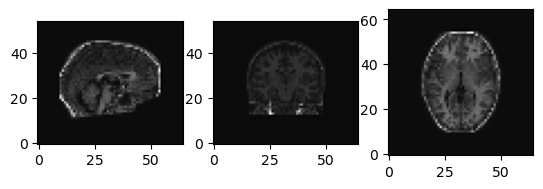

In [784]:
show_mri_slices(MRI)

## Question 3

### Normalize Pixel Intensities

Image intensity values can vary widely from image to image. In order to standardize operations on MRI images, it is necessary to normalize the values.

Write a function to normalize the voxel intensities of the image to a range of 0 to 1 using the formula:

\begin{equation}
 \text{Normalized Voxel Value} = \frac{\text{Voxel Value} - \text{Min}}{\text{Max} - \text{Min}} 
\end{equation}

In [788]:
#solution
def normalize(img):
    return (img - img.min())/(img.max() - img.min()) 

Apply your function to the original image to produce a new <b>MRI_norm</b> object

In [791]:
MRI_norm = normalize(MRI)

Run <b>show_mri_slices()</b> and print the new min, max, mean, and standard deviation

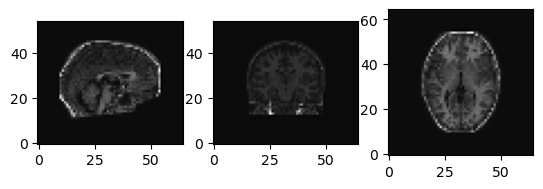

In [794]:
show_mri_slices(MRI_norm)

In [796]:
print("Min:",MRI_norm.min()," Max:",MRI_norm.max(), " Mean:",MRI_norm.mean()," Stdev:",MRI_norm.std())

Min: 0.0  Max: 1.0  Mean: 0.058676764  Stdev: 0.043430254


## Question 4
(ndarray modification, vectorization, boolean evaluation, namespaces)

### Skull stripping

In order to focus on soft tissue structures in the brain, images are routinely stripped of non-brain material. Bone marrow contains high water content and shows up with high signal intensity in the scan. This is illustrated by the bright band that surrounds the brain in MRI images.


Write a function to strip the bright white skull/marrow artifacts from the image.

Skull voxels denoted (in this case) by intensity values > 0.25



In [800]:
def strip_skull(img):
    return(np.where(img > 0.25, 0, img))

Apply your function to your normalized image to produce a new <b>MRI_stripped</b> image

In [803]:
MRI_stripped = strip_skull(MRI_norm)

Display your results

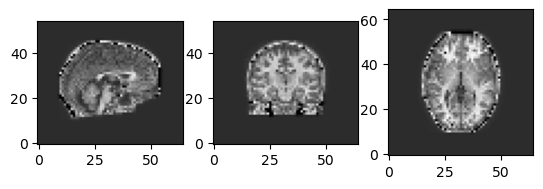

In [806]:
show_mri_slices(MRI_stripped)

Print the min, max, mean, standard deviation of the image.

In [809]:
print("Min:",MRI_stripped.min()," Max:",MRI_stripped.max(), " Mean:",MRI_stripped.mean()," Stdev:",MRI_stripped.std())

Min: 0.0  Max: 0.2499774  Mean: 0.05571383  Stdev: 0.034596063


## Question 5

Suppose we want to locate the slice in the image that contains the most material, i.e. where the sum of the voxel intensities is greatest.

Write a function that locates the slice index along the first dimension, with the greatest volume of material.

Apply your function to the <b>MRI_stripped</b> object and report the index value.

In [982]:
#solution
def max_density(img):
    return np.argmax(img.sum(axis=(1,2)))  

In [984]:
index=max_density(MRI_stripped)

Now, write a function to plot the single image with the computed index. 

Apply your function to display the slice with greatest volume of material. 

In [989]:
#solution
def show_mri_slice(slice):
    #Function to display the MRI image slice 
    plt.imshow(slice.T, cmap=plt.cm.gray, origin="lower")
    plt.show()

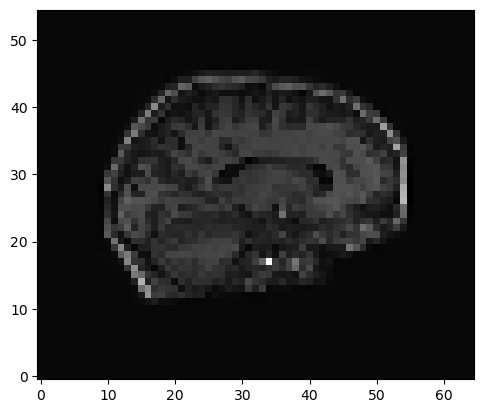

In [991]:
show_mri_slice(MRI_norm[index,:,:])